# Modeling for multiple states

## import libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, plot_confusion_matrix, classification_report, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

## import cleaned csv

In [6]:
TX = pd.read_csv('Data/Texas_data.csv')
FL = pd.read_csv('Data/Florida_data.csv')
CO = pd.read_csv('Data/Colorado_data.csv')

In [19]:
df = TX.merge(TX, how = 'outer')
final = df.merge(CO, how = 'outer')

In [20]:
final

,County_Name,date,Rest_order,Mask_order,Face_Masks_Required_in_Public,General_GB_order_group,With_SD_order_group,Cases,population,Cases/Population
0,Apache County,2020-03-11,0,0,0,1,2,0,71887,0.000000
1,Cochise County,2020-03-11,0,0,0,1,2,0,125922,0.000000
2,Coconino County,2020-03-11,0,0,0,1,2,0,143476,0.000000
3,Gila County,2020-03-11,0,0,0,1,2,0,54018,0.000000
4,Graham County,2020-03-11,0,0,0,1,2,1,38837,0.000026
...,...,...,...,...,...,...,...,...,...,...
47737,Summit County,2021-01-31,0,2,1,0,0,2646,31011,0.085325
47738,Teller County,2021-01-31,0,2,1,0,0,1181,25388,0.046518
47739,Washington County,2021-01-31,0,2,1,0,0,363,4908,0.073961
47740,Weld County,2021-01-31,0,2,1,0,0,23586,324492,0.072686


In [21]:
y = final['Cases/Population']
X = final.drop(columns = ['Cases/Population', 'County_Name','date','population','Cases'], axis = 1)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [23]:
## Model Evaluator Function
def evaluator(X_train, y_train, X_test, y_test, model):   
    start = time.time()
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    end = time.time()
    print("Model Time: {}".format(end-start))
    print('R Squared Score is:', r2_score(y_test, test_preds))
    print('Training:')
    print('Mean Absolute Error:', mean_absolute_error(y_train, train_preds))  
    print('Mean Squared Error:', mean_squared_error(y_train, train_preds))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, train_preds)))
    print('Testing:')
    print('Mean Absolute Error:', mean_absolute_error(y_test, test_preds))  
    print('Mean Squared Error:', mean_squared_error(y_test, test_preds))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, test_preds)))

In [24]:
GBR_best = GradientBoostingRegressor(learning_rate = 0.5,
 max_depth = 4,
 n_estimators = 100,
 random_state= 2,
 subsample= 0.25)

evaluator(x_train, y_train, x_test, y_test, GBR_best)

Model Time: 0.4228849411010742
R Squared Score is: 0.5990349098109042
Training:
Mean Absolute Error: 0.010700209792640223
Mean Squared Error: 0.0003637576140411006
Root Mean Squared Error: 0.019072430732371283
Testing:
Mean Absolute Error: 0.010507836091061196
Mean Squared Error: 0.00034060023550806524
Root Mean Squared Error: 0.018455357907883153


In [25]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_) 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

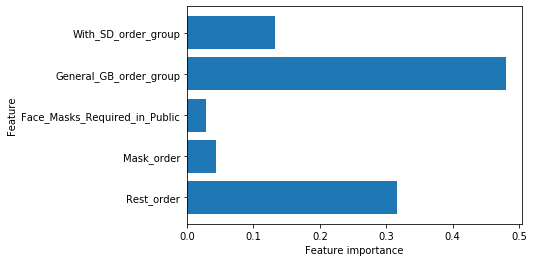

In [26]:
plot_feature_importances(GBR_best)

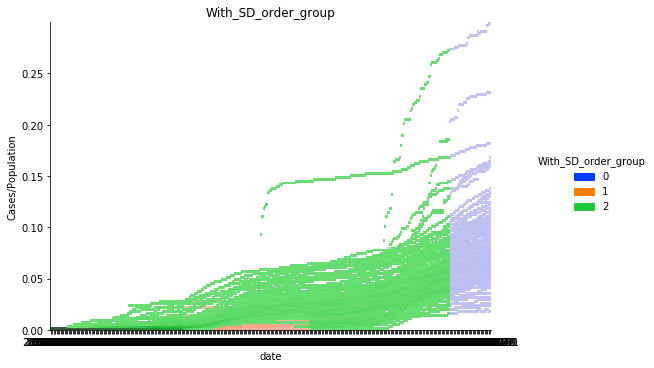

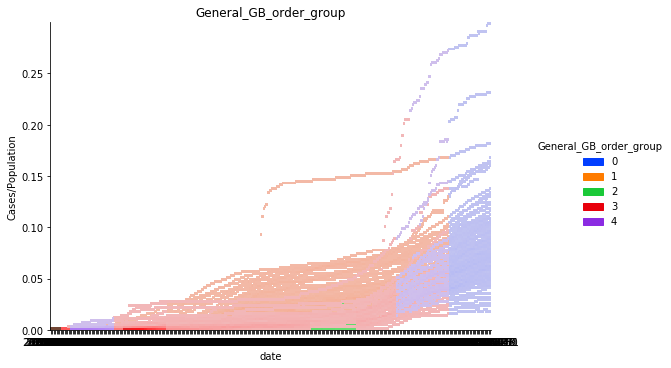

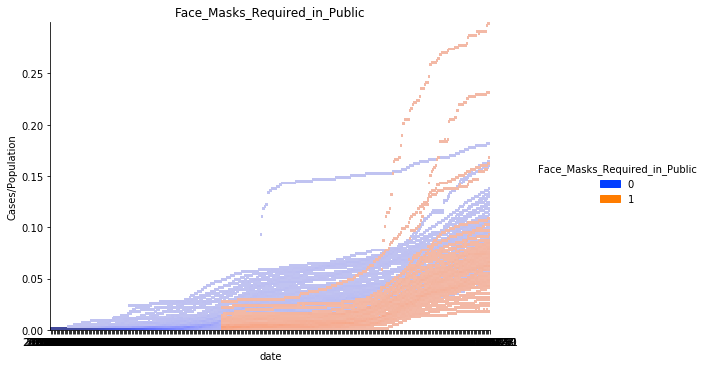

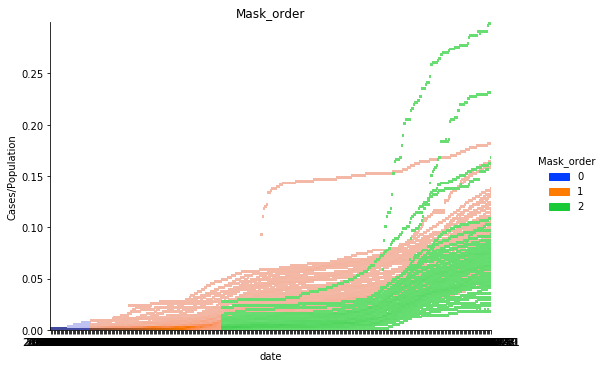

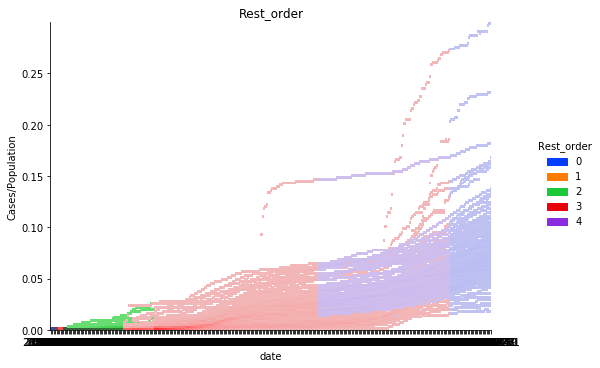

In [27]:
hues = ["With_SD_order_group","General_GB_order_group","Face_Masks_Required_in_Public","Mask_order","Rest_order"]


for hue in hues:
    sns.displot(data = final, x = "date", y = "Cases/Population", hue = hue, palette = "bright", aspect = 1.5)
    plt.title(f"{hue}")